## ***Goal for today is to see to get topics from the coronavirus tweets and see if we can predict the topic from other features of the tweet.***

install and setup

In [ ]:
!pip install nltk

In [ ]:
! sudo apt install openjdk-8-jdk
! sudo update-alternatives --config java

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libxxf86dga1 openjdk-8-jdk-headless openjdk-8-jre
  openjdk-8-jre-headless x11-utils
Suggested packages:
  openjdk-8-demo openjdk-8-source visualvm icedtea-8-plugin libnss-mdns
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libxxf86dga1 openjdk-8-jdk openjdk-8-jdk-headless
  openjdk-8-jre openjdk-8-jre-headless x11-utils
0 upgraded, 10 newly installed, 0 to remove and 29 not upgraded.
Need to get 40.7 MB of archives.
After this operation, 153 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libxxf86dga1 amd64 2:1.1.4-1 [1

In [ ]:
import pandas as pd

Load files from drive. I'm using the staff-given Kaggle dataset for Coronavirus Tweets

In [ ]:
copied_path = "drive/My Drive/CIS545/tweets/2020-03-12 Coronavirus Tweets.CSV"
data12 = pd.read_csv(copied_path)
copied_path = "drive/My Drive/CIS545/tweets/2020-03-13 Coronavirus Tweets.CSV"
data13 = pd.read_csv(copied_path)
copied_path = "drive/My Drive/CIS545/tweets/2020-03-14 Coronavirus Tweets.CSV"
data14 = pd.read_csv(copied_path)
copied_path = "drive/My Drive/CIS545/tweets/2020-03-15 Coronavirus Tweets.CSV"
data15 = pd.read_csv(copied_path)
copied_path = "drive/My Drive/CIS545/tweets/2020-03-16 Coronavirus Tweets.CSV"
data16 = pd.read_csv(copied_path)
copied_path = "drive/My Drive/CIS545/tweets/2020-03-17 Coronavirus Tweets.CSV"
data17 = pd.read_csv(copied_path)
copied_path = "drive/My Drive/CIS545/tweets/2020-03-18 Coronavirus Tweets.CSV"
data18 = pd.read_csv(copied_path)
copied_path = "drive/My Drive/CIS545/tweets/2020-03-19 Coronavirus Tweets.CSV"
data19 = pd.read_csv(copied_path)
copied_path = "drive/My Drive/CIS545/tweets/2020-03-20 Coronavirus Tweets.CSV"
data20 = pd.read_csv(copied_path)
copied_path = "drive/My Drive/CIS545/tweets/2020-03-21 Coronavirus Tweets.CSV"
data21 = pd.read_csv(copied_path)
copied_path = "drive/My Drive/CIS545/tweets/2020-03-22 Coronavirus Tweets.CSV"
data22 = pd.read_csv(copied_path)
copied_path = "drive/My Drive/CIS545/tweets/2020-03-23 Coronavirus Tweets.CSV"
data23 = pd.read_csv(copied_path)
copied_path = "drive/My Drive/CIS545/tweets/2020-03-24 Coronavirus Tweets.CSV"
data24 = pd.read_csv(copied_path)
copied_path = "drive/My Drive/CIS545/tweets/2020-03-25 Coronavirus Tweets.CSV"
data25 = pd.read_csv(copied_path)
copied_path = "drive/My Drive/CIS545/tweets/2020-03-26 Coronavirus Tweets.CSV"
data26 = pd.read_csv(copied_path)
copied_path = "drive/My Drive/CIS545/tweets/2020-03-27 Coronavirus Tweets.CSV"
data27 = pd.read_csv(copied_path)
copied_path = "drive/My Drive/CIS545/tweets/2020-03-28 Coronavirus Tweets.CSV"
data28 = pd.read_csv(copied_path)
copied_path = "drive/My Drive/CIS545/tweets/2020-03-00 Coronavirus Tweets (pre 2020-03-12).CSV"
data00 = pd.read_csv(copied_path)

Remove non-english tweets. We have to do this as our topic modeliing depends on words thus we need one single language for ideal results

In [ ]:
data00 = data00.loc[data00['lang']=='en']

data12 = data12.loc[data12['lang']=='en']
data13 = data13.loc[data13['lang']=='en']
data14 = data14.loc[data14['lang']=='en']
data15 = data15.loc[data15['lang']=='en']
data16 = data16.loc[data16['lang']=='en']
data17 = data17.loc[data17['lang']=='en']
data18 = data18.loc[data18['lang']=='en']
data19 = data19.loc[data19['lang']=='en']
data20 = data20.loc[data20['lang']=='en']
data21 = data21.loc[data21['lang']=='en']
data22 = data22.loc[data22['lang']=='en']
data23 = data23.loc[data23['lang']=='en']
data24 = data24.loc[data24['lang']=='en']
data25 = data25.loc[data25['lang']=='en']
data26 = data26.loc[data26['lang']=='en']
data27 = data27.loc[data27['lang']=='en']
data28 = data28.loc[data28['lang']=='en']


just seeing lengths of our datasets

In [ ]:
print(len(data12.index),len(data00.index),len(data13.index),len(data14.index),len(data15.index),len(data16.index),len(data17.index),len(data18.index),len(data19.index),len(data20.index),len(data21.index),len(data22.index),len(data23.index),len(data24.index),len(data25.index),len(data26.index),len(data27.index),len(data28.index))
min(len(data12.index),len(data00.index),len(data13.index),len(data14.index),len(data15.index),len(data16.index),len(data17.index),len(data18.index),len(data19.index),len(data20.index),len(data21.index),len(data22.index),len(data23.index),len(data24.index),len(data25.index),len(data26.index),len(data27.index),len(data28.index))

266957 288215 546426 248617 260908 330443 451418 335517 458397 421237 449872 401212 385869 357645 388492 505260 381271 310848


248617

Combining our data into a single dataframe

In [ ]:
x = 1000
sample_data = pd.concat([data00[:x], data12[:x], data13[:x], data14[:x], data15[:x],
                         data16[:x], data17[:x], data18[:x], data19[:x], data20[:x], data21[:x], 
                         data22[:x], data23[:x], data24[:x], data25[:x], data26[:x], data27[:x],
                         data28[:x]], ignore_index=True)
sample_data

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang,date
0,1236803889497886720,977945240140173318,2020-03-09T00:00:00Z,deepnews_ai,During a health scare like the #CoronavirusOut...,TweetDeck,NaN,NaN,NaN,True,False,20,0,NaN,NaN,NaN,1096,835,NaN,2018-03-25T16:28:09Z,False,en,0
1,1236803946619875328,270009645,2020-03-09T00:00:14Z,kwekwayel,@Twitter please update reporting to include fa...,Twitter for iPhone,NaN,7.832140e+05,Twitter,False,False,2087,0,NaN,NaN,NaN,202,624,NaN,2011-03-21T21:03:44Z,False,en,0
2,1236804006380482566,846210311631851520,2020-03-09T00:00:28Z,mystylehfb,Germ Guardian Pluggable Air Purifier &amp; San...,Buffer,NaN,NaN,NaN,False,False,3618,0,NaN,NaN,NaN,5777,6332,NaN,2017-03-27T04:00:34Z,False,en,0
3,1236804038147993600,1111290462361407488,2020-03-09T00:00:36Z,SaintBrothel,Simple math proves the Chinese government is l...,Twitter for iPhone,NaN,NaN,NaN,True,False,2,0,NaN,NaN,NaN,3725,3812,NaN,2019-03-28T15:34:27Z,False,en,0
4,1236804066304352257,270652316,2020-03-09T00:00:42Z,BlackPearl_Inc,Classes were suspended in the following cities...,Twitter Web App,NaN,NaN,NaN,False,False,334,0,NaN,NaN,NaN,399,2832,NaN,2011-03-23T00:50:38Z,False,en,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,1243690088640503808,20022452,2020-03-28T00:03:18Z,NatasjaYonce,@HumansAreLoco @xernue @Cernovich Do you know ...,Twitter for iPhone,1.243616e+18,1.152284e+18,HumansAreLoco,False,False,106711,0,NaN,NaN,NaN,11276,5721,NaN,2009-02-04T02:30:07Z,False,en,28
17996,1243690088392949761,701696631331287040,2020-03-28T00:03:18Z,altmann_tim,@Jeremy_Hunt so vocal from the backbenches re ...,Twitter for Android,NaN,1.123987e+08,Jeremy_Hunt,False,False,28852,0,NaN,NaN,NaN,5674,6157,NaN,2016-02-22T09:14:48Z,False,en,28
17997,1243690090645401601,295710814,2020-03-28T00:03:18Z,ForeignC,#Mexico—Protesters block Americans from crossi...,Twitter for iPhone,NaN,NaN,NaN,False,False,21224,0,NaN,NaN,NaN,2102,1664,NaN,2011-05-09T14:50:10Z,False,en,28
17998,1243690090204930062,1066989950938304512,2020-03-28T00:03:18Z,VINASBusinesses,"LET'S LEAVE THIS HERE: @HEBobiwine, the Uganda...",Twitter Web App,NaN,NaN,NaN,False,False,198,0,NaN,NaN,NaN,324,740,NaN,2018-11-26T09:40:02Z,False,en,28


The following function is called later and removes links and ampersands from strings

In [ ]:
def removeLink(str1):
  
  x = 0
  y = 0
  final_str = str1

  x = 0
  y = 0
  while (x != -1 and y!=-1):
    x = str1.find('http',y)
    y = str1.find(' ',x)
    if (x!=-1):
      if (y!=-1):
        final_str = final_str.replace(str1[x:y], "")
      else:
        final_str = final_str.replace(str1[x:], "")    
  final_str =final_str.replace('@', '')
  return final_str.replace('#', '')

removeLink('g20 leaders agreed combating #coronavirus pandemic calls transparent robust coordinated large-scale science-based global response spirit solidarity #g20virtualsummit #g20saudiarabia https://co/6vojl5kavx')  

'g20 leaders agreed combating coronavirus pandemic calls transparent robust coordinated large-scale science-based global response spirit solidarity g20virtualsummit g20saudiarabia '

This one returns a list of hashtags from a string

In [ ]:
def getHashtag(str1):
  x = 0
  y = 0
  hashes = []
  while (x != -1 and y!=-1):
    x = str1.find('#',y)
    y = str1.find(' ',x)
    if (x!=-1):
      if (y!=-1):
        hashes.append(str1[x:y])
      else:
        hashes.append(str1[x:])  
  return hashes        
print(getHashtag('g20 leaders agreed combating #coronavirus pandemic calls transparent robust coordinated large-scale science-based global response spirit solidarity #g20virtualsummit #g20saudiarabia https://co/6vojl5kavx'))

['#coronavirus', '#g20virtualsummit', '#g20saudiarabia']


In [ ]:
#just a list of strings of length 1 and 2
import string
l = []
for c in string.ascii_lowercase:
  l.append(c)
  for d in string.ascii_lowercase:
    l.append(c+d)


# We now start cleaning our text. Processes done are 

Note: We use the maain text of our tweet to get topics
1. Convert to string just in case
2. COnvert to lowercase
3. Get hashtags
4. Remove hyperlinks and #'s

5. Remove stopwords
6. Remove punctuation. 


In the next piece of code we will be Lemmatizing our text as well as remove some added things of it.

In [ ]:
import re
sample_data['content'] = sample_data['text'].astype(str)
sample_data['content_p'] = sample_data['content'].map(lambda x: x.lower())
sample_data['hashtag'] = sample_data['content_p'].map(getHashtag)
sample_data['content_p'] = sample_data['content_p'].map(removeLink)

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop.extend(l)
pat = r'\b(?:{})\b'.format('|'.join(stop))
sample_data['content_p'] = sample_data['content_p'].str.replace(pat, '')
sample_data['content_p'] = sample_data['content_p'].str.replace(r'\s+', ' ')
sample_data['content_p'] = sample_data['content_p'].map(lambda x: re.sub('[,\.!?’‘]', '', x))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Lemmatization:

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer=WordNetLemmatizer()
remove_list = ['amp', 'http', '19']
def subLemma(word):
  word = lemmatizer.lemmatize(word) #lemmatize
  find_result = list(map(word.find, remove_list))

  if (sum(find_result) > -1 * len(find_result)):
    return ''
  else:
    return word  
def lemma (input_str):
  input_str=word_tokenize(input_str)
  input_str = list(map(subLemma, input_str))
  return ' '.join(input_str)
  
lemma('G20 leaders agreed #coronaviru combating pandemic calls transparent robust coordinated large-scale science-based global response spirit solidarity ')

sample_data['content_p'] = sample_data['content_p'].apply(lambda x: lemma(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# LDA Prep:
We can now use Count Vectorizer on our fata to prepare it for LDA. Meanwhile let's also see what the top words are 

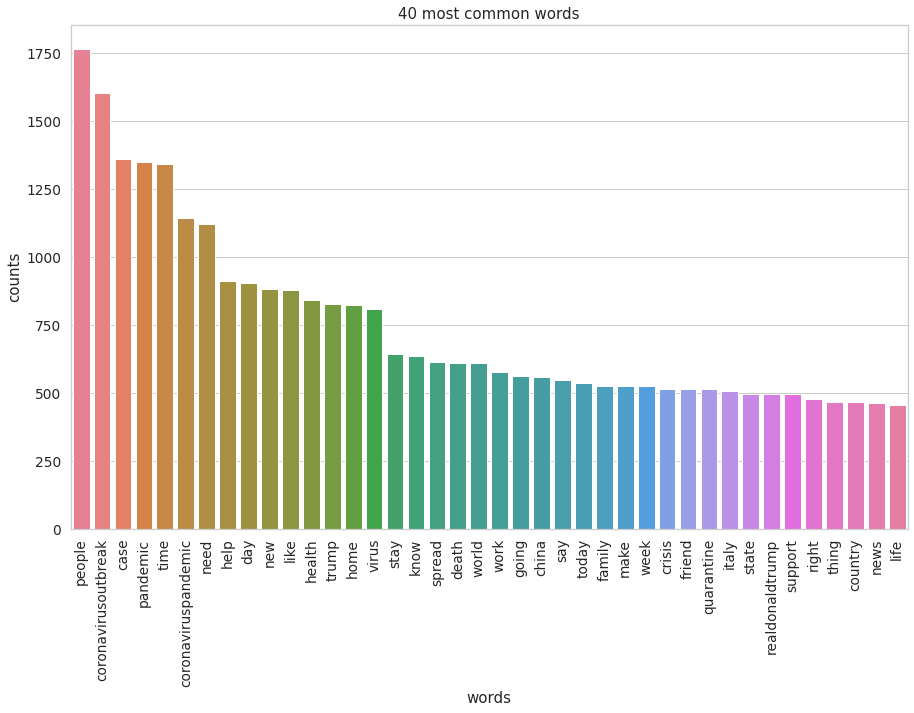

In [ ]:
#The graph code is not my work

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_40_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[:40]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='40 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    return count_dict
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english', max_df=0.1, min_df=0.001)
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(sample_data['content_p'])

# Visualise the 10 most common words
count_dict = plot_40_most_common_words(count_data, count_vectorizer)

# GridSearch LDA
GridSearch allows us to to see which number of topics to choose. I have started with 3 and not 2 as 3 is a minimum number for some analysis i want to do.

In [ ]:
# Define Search Param
search_params = {'n_components': [3, 4,7, 10, 15], 'learning_decay': [.7]}
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Init the Model
lda = LDA()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(count_data)
GridSearchCV(cv=None, error_score='raise',
       estimator=LDA(n_jobs=-1, random_state=42),
       param_grid={'n_topics': [3,4, 7, 10, 15], 'learning_decay': [0.7]})
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(count_data))

Best Model's Params:  {'learning_decay': 0.7, 'n_components': 3}
Best Log Likelihood Score:  -229955.00572579744
Model Perplexity:  1136.019356684586


# Start LDA

First you see a function to print top doucments
Then you see an LDA with topics = 3. Randomstate has arbitrarily been selected as 42 just to allow me to get the same results

In [ ]:
#function to print lda and top documents

import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
documents = sample_data['text'].tolist() 
# Helper function
def print_topics(model, count_vectorizer, n_top_words, no_top_documents, no_chars):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        W = model.transform(count_data)
       
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
          print(doc_index)
          print (documents[doc_index])

In [ ]:

#Actual LDA with 3 topics
        
# Tweak the two parameters below
number_topics = 3
number_words = 20
number_documents = 10
# Create and fit the LDA model
random_number = np.random.random()
print(random_number)
lda = LDA(n_components=number_topics, n_jobs=-1, random_state=42)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words, number_documents, 150)


0.18860708209642063
Topics found via LDA:

Topic #0:
pandemic help need health time crisis stay social safe home business worker people care community spread work public fight thank
3141
Hi @BorisJohnson thanks for the UK’s incredible support to tackle #COVID19. As the crisis grows @WHO @DrTedros urgently need at least USD $675 million to protect millions at risk — I hope @DFID_UK will continue to pledge more funds. We can beat this pandemic and keep the 🌍 safe.
3724
Hi @BorisJohnson thanks for the UK’s incredible support to tackle #COVID19. As the crisis grows @WHO @DrTedros urgently need at least USD $675 million to protect millions at risk — I hope @DFID_UK will continue to pledge more funds. We can beat this pandemic and keep the 🌍 safe.
3884
Hi @BorisJohnson thanks for the UK’s incredible support to tackle #COVID19. As the crisis grows @WHO @DrTedros urgently need at least USD $675 million to protect millions at risk — I hope @DFID_UK will continue to pledge more funds. We can bea

# Start Analysis:

First let's assign topics to each tweet, sum that number up, as well as store the strings in each topic

In [ ]:
import numpy as np
transformed = lda.transform(count_data)
final_t1 = []
final_t2 = []
final_t0 = []
t0_str = []
t1_str = []
t2_str = []
sample_data['topic'] = 0
for i in range(18):
  t0=0
  t1=0
  t2=0
  for j in range(x):
    temp = transformed[i*x+j]
    topic = np.argmax(temp)
    if topic==0:
      t0 = t0+1
      
      t0_str.append(sample_data.content_p[i*x+j])
    if topic==1:
      t1 = t1+1
      sample_data['topic'][i*x+j] = 1
      t1_str.append(sample_data.content_p[i*x+j])
    if topic==2:
      t2 = t2+1    
      sample_data['topic'][i*x+j] = 2
      t2_str.append(sample_data.content_p[i*x+j])
  final_t0.append(t0/x)
  final_t1.append(t1/x)
  final_t2.append(t2/x)
final_t0
t0_str = " ".join(t0_str)
t1_str = " ".join(t1_str)
t2_str = " ".join(t2_str)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


WOrdCloud for topic 0

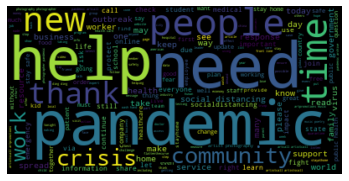

In [ ]:

!pip install wordcloud
from wordcloud import WordCloud
text = t0_str
input_str=word_tokenize(text)
remove_list = ['amp', 'http', '19', 'coron', 'covi']
def subLemma(word):
  find_result = list(map(word.find, remove_list))
  if (sum(find_result) > -1 * len(find_result)):
    return ''
  else:
    return word  
input_str = list(map(subLemma, input_str))
text = ' '.join(input_str)
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

WOrdCloud for topic 1

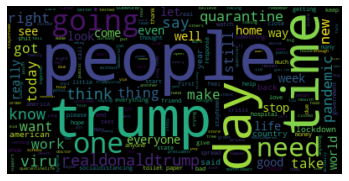

In [ ]:
text = t1_str
input_str=word_tokenize(text)
remove_list = ['amp', 'http', '19', 'coron', 'covi']
def subLemma(word):
  find_result = list(map(word.find, remove_list))
  if (sum(find_result) > -1 * len(find_result)):
    return ''
  else:
    return word  
input_str = list(map(subLemma, input_str))
text = ' '.join(input_str)
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

WOrdCloud for topic 2

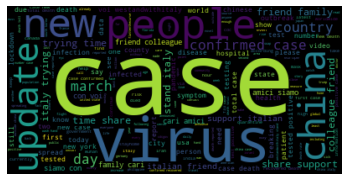

In [ ]:
text = t2_str
input_str=word_tokenize(text)
remove_list = ['amp', 'http', '19', 'coron', 'covi']
def subLemma(word):
  find_result = list(map(word.find, remove_list))
  if (sum(find_result) > -1 * len(find_result)):
    return ''
  else:
    return word  
input_str = list(map(subLemma, input_str))
text = ' '.join(input_str)
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#Topic Description
Using the above printing of top documents and the wordclouds we can eyeball and get a general idea of what our topics are about. The following is my best description of the topics.
#.
Topic 0: This is about the impact of the coronavirus on personal lives. This includes tweets about social distancing, quaranitne and the need for compassion, family etc.
#.
Topic 1: This is about its impact outside the personal world with a fair share of politics thrown in as shown by the immense use of the word Trump
#.
Topic 2: This is about updates related to the coronavirus. This is seen prominently in Cases being prominently in the topic as well as the words update and china which reflect this
#. 
This description of our topics helps us undertstand the future analysis and graphs much better

# Start Graphs


This graph shows how the percentage of tweets for each topic has changed over time. We can also interpret the graphs in terms of the knowledge we know

At the start all coronavirus tweets were dominated by facts, updates, politics as people werent necessarily persoanlly impacted by virus (people of english speaking countries).
However, as social distancing measures went to effect, tweets about quararnitne and social distancing topic saw a marked increase.
Update tweets remianed steady as daily updates for instance cant change in number, they are daily by definition. 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: Second argument 'y1' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: Second argument 'y2' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: Second argument 'y3' is ambiguous: could be a format 

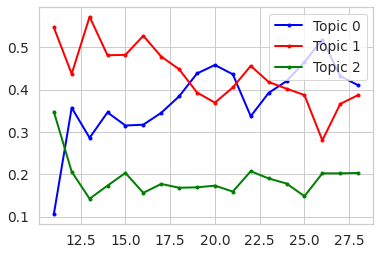

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
df=pd.DataFrame({'x': range(11,29), 'y1': final_t0, 'y2': final_t1, 'y3': final_t2 })
 
# multiple line plot
plt.plot( 'x', 'y1', data=df, marker='.', color='blue', linewidth=2, label="Topic 0")
plt.plot( 'x', 'y2', data=df, marker='.', color='red', linewidth=2, label="Topic 1")
plt.plot( 'x', 'y3', data=df, marker='.', color='green', linewidth=2, label="Topic 2")
plt.legend()

In [ ]:
#Get favoriites count for each topic and ratio with other topics

import numpy as np
transformed = lda.transform(count_data)
final_t1 = []
final_t2 = []
final_t0 = []
for i in range(18):
  t0=0
  t1=0
  t2=0
  for j in range(x):
    temp = transformed[i*x+j]
    topic = np.argmax(temp)
    if topic==0:
      t0 = t0+sample_data.favourites_count[i*x+j].astype('int32')
    if topic==1:
      t1 = t1+sample_data.favourites_count[i*x+j].astype('int32')
    if topic==2:
      t2 = t2+sample_data.favourites_count[i*x+j].astype('int32')
  final_t0.append(t0/(t0+t1+t2))
  final_t1.append(t1/(t0+t1+t2))
  final_t2.append(t2/(t0+t1+t2))
final_t0


[0.0776378491919753,
 0.32871962353993567,
 0.31189147971567593,
 0.2693132617466197,
 0.2527556472182585,
 0.2949344733714731,
 0.25127033865482523,
 0.2685326162354624,
 0.38850301066364007,
 0.3466205719154913,
 0.3610895592930306,
 0.24079805695524625,
 0.29026708460085776,
 0.2781294888443656,
 0.3604249902993266,
 0.37726678628055965,
 0.38614969185082565,
 0.288701276245727]

This graph below shows that even if the actual number of tweets for each topic might vary, the topic to get the most favorities has never changed. This is the topic related to politics and business world. Topic 0 was initially extremely small but the reason for this is understood above to be that social distanicng etc just hadnt started yet 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Second argument 'y1' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: Second argument 'y2' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: Second argument 'y3' is ambiguous: could be a format string but is in 'data'; using as data.

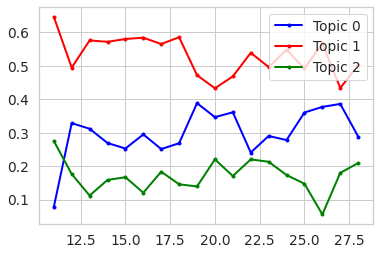

In [ ]:
df=pd.DataFrame({'x': range(11,29), 'y1': final_t0, 'y2': final_t1, 'y3': final_t2 })
 
# multiple line plot
plt.plot( 'x', 'y1', data=df, marker='.', color='blue', linewidth=2, label="Topic 0")
plt.plot( 'x', 'y2', data=df, marker='.', color='red', linewidth=2, label="Topic 1")
plt.plot( 'x', 'y3', data=df, marker='.', color='green', linewidth=2, label="Topic 2")
plt.legend()

This graph below shows the average favorite for each topic. noticing a trend is difficult but we can see that coronavirus tweets across topics (except for social) used to get much higher avergae favorities **befoee**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: Second argument 'y1' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: Second argument 'y2' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: Second argument 'y3' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the forma

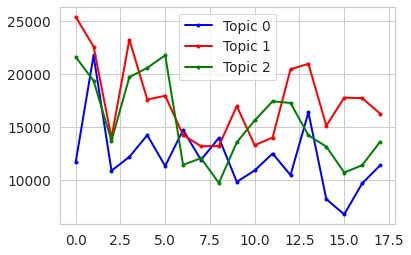

In [ ]:
import numpy as np
transformed = lda.transform(count_data)
final_t1 = []
final_t2 = []
final_t0 = []
for i in range(18):
  t0=0
  t00 = 0
  t1=0
  t11 = 0
  t2=0
  t22 = 0
  for j in range(x):
    temp = transformed[i*x+j]
    topic = np.argmax(temp)
    if topic==0:
      t0 = t0+sample_data.favourites_count[i*x+j].astype('int32')
      t00 = t00 +1
    if topic==1:
      t1 = t1+sample_data.favourites_count[i*x+j].astype('int32')
      t11 = t11 + 1
    if topic==2:
      t22 = t22 +1
      t2 = t2+sample_data.favourites_count[i*x+j].astype('int32')
  final_t0.append(t0/t00)
  final_t1.append(t1/t11)
  final_t2.append(t2/t22)
df=pd.DataFrame({'x': range(0,18), 'y1': final_t0, 'y2': final_t1, 'y3': final_t2 })
 
# multiple line plot
plt.plot( 'x', 'y1', data=df, marker='.', color='blue', linewidth=2, label="Topic 0")
plt.plot( 'x', 'y2', data=df, marker='.', color='red', linewidth=2, label="Topic 1")
plt.plot( 'x', 'y3', data=df, marker='.', color='green', linewidth=2, label="Topic 2")
plt.legend()

Graph below for retweets compared to other topics: We see a similar pattern as favorities one but much higher varibailty

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: Second argument 'y1' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: Second argument 'y2' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: Second argument 'y3' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the forma

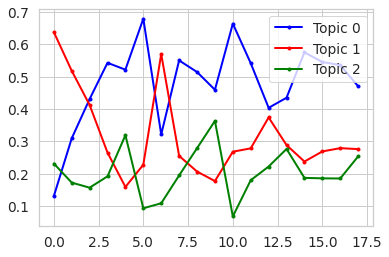

In [ ]:
final_t1 = []
final_t2 = []
final_t0 = []
for i in range(18):
  t0=0
  t00 = 0
  t1=0
  t11 = 0
  t2=0
  t22 = 0
  for j in range(x):
    temp = transformed[i*x+j]
    topic = np.argmax(temp)
    if topic==0:
      t0 = t0+sample_data.retweet_count[i*x+j].astype('int32')
      t00 = t00 +1
    if topic==1:
      t1 = t1+sample_data.retweet_count[i*x+j].astype('int32')
      t11 = t11 + 1
    if topic==2:
      t22 = t22 +1
      t2 = t2+sample_data.retweet_count[i*x+j].astype('int32')
  final_t0.append(t0/(t0+t1+t2))
  final_t1.append(t1/(t0+t1+t2))
  final_t2.append(t2/(t0+t1+t2))
df=pd.DataFrame({'x': range(0,18), 'y1': final_t0, 'y2': final_t1, 'y3': final_t2 })
 
# multiple line plot
plt.plot( 'x', 'y1', data=df, marker='.', color='blue', linewidth=2, label="Topic 0")
plt.plot( 'x', 'y2', data=df, marker='.', color='red', linewidth=2, label="Topic 1")
plt.plot( 'x', 'y3', data=df, marker='.', color='green', linewidth=2, label="Topic 2")
plt.legend()

This graph below shows that people with higher follower counts jumped on topic 0 later but the inital period primairly had high followe counts for the Updates ones



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: Second argument 'y1' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: Second argument 'y2' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: Second argument 'y3' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the forma

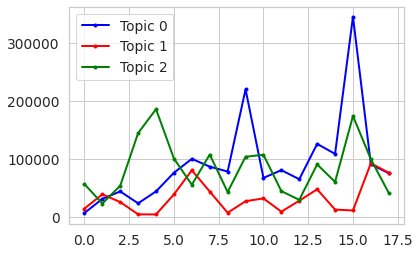

In [ ]:
final_t1 = []
final_t2 = []
final_t0 = []
for i in range(18):
  t0=0
  t00 = 0
  t1=0
  t11 = 0
  t2=0
  t22 = 0
  for j in range(x):
    temp = transformed[i*x+j]
    topic = np.argmax(temp)
    if topic==0:
      t0 = t0+sample_data.followers_count[i*x+j].astype('int32')
      t00 = t00 +1
    if topic==1:
      t1 = t1+sample_data.followers_count[i*x+j].astype('int32')
      t11 = t11 + 1
    if topic==2:
      t22 = t22 +1
      t2 = t2+sample_data.followers_count[i*x+j].astype('int32')
  final_t0.append(t0/t00)
  final_t1.append(t1/t11)
  final_t2.append(t2/t22)
df=pd.DataFrame({'x': range(0,18), 'y1': final_t0, 'y2': final_t1, 'y3': final_t2 })
 
# multiple line plot
plt.plot( 'x', 'y1', data=df, marker='.', color='blue', linewidth=2, label="Topic 0")
plt.plot( 'x', 'y2', data=df, marker='.', color='red', linewidth=2, label="Topic 1")
plt.plot( 'x', 'y3', data=df, marker='.', color='green', linewidth=2, label="Topic 2")
plt.legend()

Grph below shows Topic 0 later got the most followers compared to the other topics

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: Second argument 'y1' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: Second argument 'y2' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: Second argument 'y3' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the forma

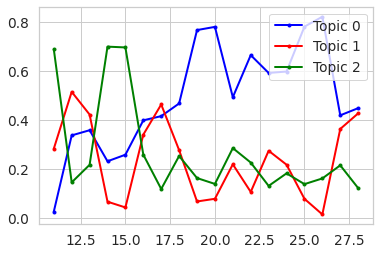

In [ ]:
import numpy as np
transformed = lda.transform(count_data)
final_t1 = []
final_t2 = []
final_t0 = []
for i in range(18):
  t0=0
  t1=0
  t2=0
  for j in range(x):
    temp = transformed[i*x+j]
    topic = np.argmax(temp)
    if topic==0:
      t0 = t0+sample_data.followers_count[i*x+j].astype('int32')
    if topic==1:
      t1 = t1+sample_data.followers_count[i*x+j].astype('int32')
    if topic==2:
      t2 = t2+sample_data.followers_count[i*x+j].astype('int32')
  final_t0.append(t0/(t0+t1+t2))
  final_t1.append(t1/(t0+t1+t2))
  final_t2.append(t2/(t0+t1+t2))
final_t0
df=pd.DataFrame({'x': range(11,29), 'y1': final_t0, 'y2': final_t1, 'y3': final_t2 })

plt.plot( 'x', 'y1', data=df, marker='.', color='blue', linewidth=2, label="Topic 0")
plt.plot( 'x', 'y2', data=df, marker='.', color='red', linewidth=2, label="Topic 1")
plt.plot( 'x', 'y3', data=df, marker='.', color='green', linewidth=2, label="Topic 2")
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: Second argument 'y1' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: Second argument 'y2' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: Second argument 'y3' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the forma

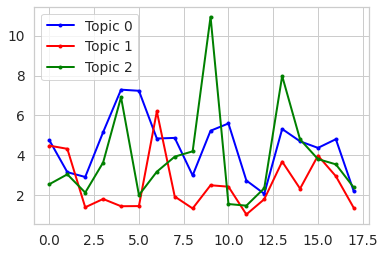

In [ ]:
final_t1 = []
final_t2 = []
final_t0 = []
for i in range(18):
  t0=0
  t00 = 0
  t1=0
  t11 = 0
  t2=0
  t22 = 0
  for j in range(x):
    temp = transformed[i*x+j]
    topic = np.argmax(temp)
    if topic==0:
      t0 = t0+sample_data.retweet_count[i*x+j].astype('int32')
      t00 = t00 +1
    if topic==1:
      t1 = t1+sample_data.retweet_count[i*x+j].astype('int32')
      t11 = t11 + 1
    if topic==2:
      t22 = t22 +1
      t2 = t2+sample_data.retweet_count[i*x+j].astype('int32')
  final_t0.append(t0/t00)
  final_t1.append(t1/t11)
  final_t2.append(t2/t22)
df=pd.DataFrame({'x': range(0,18), 'y1': final_t0, 'y2': final_t1, 'y3': final_t2 })
 
# multiple line plot
plt.plot( 'x', 'y1', data=df, marker='.', color='blue', linewidth=2, label="Topic 0")
plt.plot( 'x', 'y2', data=df, marker='.', color='red', linewidth=2, label="Topic 1")
plt.plot( 'x', 'y3', data=df, marker='.', color='green', linewidth=2, label="Topic 2")
plt.legend()

In [ ]:
sample_data['source'].value_counts()[:30].index.tolist()
#top sources

['Twitter for iPhone',
 'Twitter Web App',
 'Twitter for Android',
 'Hootsuite Inc.',
 'TweetDeck',
 'Twitter Web Client',
 'Buffer',
 'Twitter for iPad',
 'Instagram',
 'Sprout Social',
 'Twitter Media Studio',
 'VoiceToData',
 'Twitter for Advertisers',
 'LaterMedia',
 'Resistbot Open Letters',
 'SocialNewsDesk',
 'SocialFlow',
 'Sprinklr',
 'WordPress.com',
 'dlvr.it',
 'EpiResearchBot',
 'HubSpot',
 'LinkedIn',
 'AgoraPulse Manager',
 'Salesforce - Social Studio',
 'Alexander Higgins',
 'True Anthem',
 'Tweetbot for iΟS',
 'eClincher',
 'Covid2019botinfoo']

The graph below shows how the source of Coronavirus tweets has changed over time. IPhone usage markedly shows a decline probably because people are inside more?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: Second argument 'y1' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: Second argument 'y2' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: Second argument 'y3' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the forma

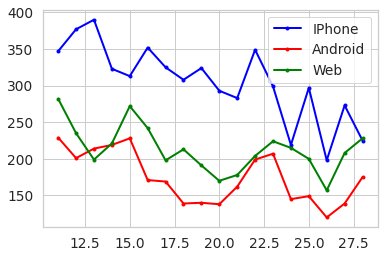

In [ ]:
final_t1 = []
final_t2 = []
final_t0 = []
for i in range(18):
  t0=0
  t00 = 0
  t1=0
  t11 = 0
  t2=0
  t22 = 0
  for j in range(x):
    temp = transformed[i*x+j]
    topic = sample_data.source[i*x+j]
    if topic=='Twitter for iPhone':
      t00 = t00 +1
    if topic=='Twitter for Android':
      
      t11 = t11 + 1
    if topic=='Twitter Web App':
      t22 = t22 +1
  final_t0.append(t00/1)
  final_t1.append(t11/1)
  final_t2.append(t22/1)
df=pd.DataFrame({'x': range(11,29), 'y1': final_t0, 'y2': final_t1, 'y3': final_t2 })
 
# multiple line plot
plt.plot( 'x', 'y1', data=df, marker='.', color='blue', linewidth=2, label="IPhone")
plt.plot( 'x', 'y2', data=df, marker='.', color='red', linewidth=2, label="Android")
plt.plot( 'x', 'y3', data=df, marker='.', color='green', linewidth=2, label="Web")
plt.legend()

The graph below shows there is a very clear separation of topics for IPhone Users. Their preferences for which topic to tweet on are well sepearated.
Politics/Business then Social then Updates

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: Second argument 'y1' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Second argument 'y2' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: Second argument 'y3' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the forma

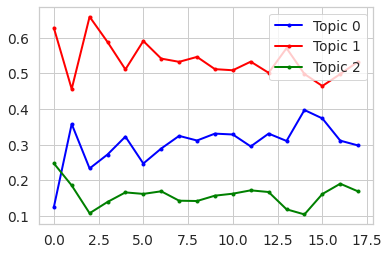

In [ ]:
final_t1 = []
final_t2 = []
final_t0 = []
for i in range(18):
  t0=0
  t00 = 0
  t1=0
  t11 = 0
  t2=0
  t22 = 0
  for j in range(x):
    temp = transformed[i*x+j]
    topic = np.argmax(temp)
    if topic==0:
      if sample_data.source[i*x+j]=='Twitter for iPhone':
        t0 = t0+1
      t00 = t00 +1
    if topic==1 :
      if sample_data.source[i*x+j]=='Twitter for iPhone':
        t1 = t1+1
      t11 = t11 + 1
    if topic==2 :
      #sample_data.source[i*x+j]=='Twitter for iPhone' or sample_data.source[i*x+j]=='Twitter for Android' or sample_data.source[i*x+j]=='Twitter Web App':
      t22 = t22 +1
      if sample_data.source[i*x+j]=='Twitter for iPhone':
        t2 = t2+1
  final_t0.append(t0/(t0+t1+t2))
  final_t1.append(t1/(t0+t1+t2))
  final_t2.append(t2/(t0+t1+t2))

df=pd.DataFrame({'x': range(0,18), 'y1': final_t0, 'y2': final_t1, 'y3': final_t2 })
 
# multiple line plot
plt.plot( 'x', 'y1', data=df, marker='.', color='blue', linewidth=2, label="Topic 0")
plt.plot( 'x', 'y2', data=df, marker='.', color='red', linewidth=2, label="Topic 1")
plt.plot( 'x', 'y3', data=df, marker='.', color='green', linewidth=2, label="Topic 2")
plt.legend()

IPhone tweets and Android tweets show similar trends with graph below

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: Second argument 'y1' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Second argument 'y2' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: Second argument 'y3' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the forma

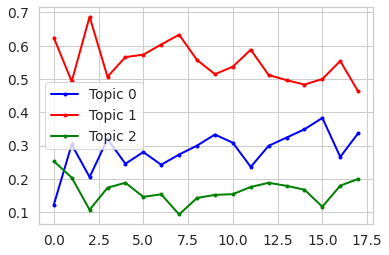

In [ ]:
final_t1 = []
final_t2 = []
final_t0 = []
for i in range(18):
  t0=0
  t00 = 0
  t1=0
  t11 = 0
  t2=0
  t22 = 0
  for j in range(x):
    temp = transformed[i*x+j]
    topic = np.argmax(temp)
    if topic==0:
      if sample_data.source[i*x+j]=='Twitter for Android':
        t0 = t0+1
      t00 = t00 +1
    if topic==1 :
      if sample_data.source[i*x+j]=='Twitter for Android':
        t1 = t1+1
      t11 = t11 + 1
    if topic==2 :
      #sample_data.source[i*x+j]=='Twitter for iPhone' or sample_data.source[i*x+j]=='Twitter for Android' or sample_data.source[i*x+j]=='Twitter Web App':
      t22 = t22 +1
      if sample_data.source[i*x+j]=='Twitter for Android':
        t2 = t2+1
  final_t0.append(t0/(t0+t1+t2))
  final_t1.append(t1/(t0+t1+t2))
  final_t2.append(t2/(t0+t1+t2))

df=pd.DataFrame({'x': range(0,18), 'y1': final_t0, 'y2': final_t1, 'y3': final_t2 })
 
# multiple line plot
plt.plot( 'x', 'y1', data=df, marker='.', color='blue', linewidth=2, label="Topic 0")
plt.plot( 'x', 'y2', data=df, marker='.', color='red', linewidth=2, label="Topic 1")
plt.plot( 'x', 'y3', data=df, marker='.', color='green', linewidth=2, label="Topic 2")
plt.legend()

Howveer there is a notieable difference between Web and Mobile users. Web Users tweet for Updates a lot more. Furthermore Web Users have over time tweeting more about Soical then Business/Politics aspect

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: Second argument 'y1' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Second argument 'y2' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: Second argument 'y3' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the forma

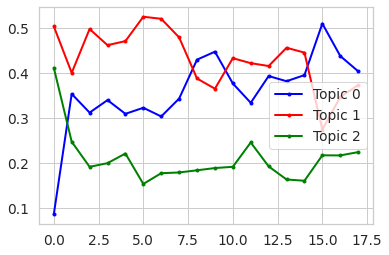

In [ ]:
final_t1 = []
final_t2 = []
final_t0 = []
for i in range(18):
  t0=0
  t00 = 0
  t1=0
  t11 = 0
  t2=0
  t22 = 0
  for j in range(x):
    temp = transformed[i*x+j]
    topic = np.argmax(temp)
    if topic==0:
      if sample_data.source[i*x+j]=='Twitter Web App':
        t0 = t0+1
      t00 = t00 +1
    if topic==1 :
      if sample_data.source[i*x+j]=='Twitter Web App':
        t1 = t1+1
      t11 = t11 + 1
    if topic==2 :
      #sample_data.source[i*x+j]=='Twitter for iPhone' or sample_data.source[i*x+j]=='Twitter for Android' or sample_data.source[i*x+j]=='Twitter Web App':
      t22 = t22 +1
      if sample_data.source[i*x+j]=='Twitter Web App':
        t2 = t2+1
  final_t0.append(t0/(t0+t1+t2))
  final_t1.append(t1/(t0+t1+t2))
  final_t2.append(t2/(t0+t1+t2))

df=pd.DataFrame({'x': range(0,18), 'y1': final_t0, 'y2': final_t1, 'y3': final_t2 })
 
# multiple line plot
plt.plot( 'x', 'y1', data=df, marker='.', color='blue', linewidth=2, label="Topic 0")
plt.plot( 'x', 'y2', data=df, marker='.', color='red', linewidth=2, label="Topic 1")
plt.plot( 'x', 'y3', data=df, marker='.', color='green', linewidth=2, label="Topic 2")
plt.legend()

In [ ]:
sample_data.head(3)

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang,date,content,content_p,topic
0,1236803889497886720,977945240140173318,2020-03-09T00:00:00Z,deepnews_ai,During a health scare like the #CoronavirusOut...,TweetDeck,NaN,NaN,NaN,True,False,20,0,NaN,NaN,NaN,1096,835,NaN,2018-03-25T16:28:09Z,False,en,0,During a health scare like the #CoronavirusOut...,health scare like coronavirusoutbreak need abl...,0
1,1236803946619875328,270009645,2020-03-09T00:00:14Z,kwekwayel,@Twitter please update reporting to include fa...,Twitter for iPhone,NaN,783214.0,Twitter,False,False,2087,0,NaN,NaN,NaN,202,624,NaN,2011-03-21T21:03:44Z,False,en,0,@Twitter please update reporting to include fa...,twitter please update reporting include false ...,2
2,1236804006380482566,846210311631851520,2020-03-09T00:00:28Z,mystylehfb,Germ Guardian Pluggable Air Purifier &amp; San...,Buffer,NaN,NaN,NaN,False,False,3618,0,NaN,NaN,NaN,5777,6332,NaN,2017-03-27T04:00:34Z,False,en,0,Germ Guardian Pluggable Air Purifier &amp; San...,germ guardian pluggable air purifier & ; sani...,2


#Predict Topic from other features
Now start some cleaning before we start our process

We do log conversion, peer at boxplots. Add length of text and screen name to our features as well as then add day of the week and date to features

In [ ]:
import math
combined_data = sample_data
combined_data['fav_log'] = combined_data['favourites_count'].apply(lambda x: math.log(x+1))
combined_data['ret_log'] = combined_data['retweet_count'].apply(lambda x: math.log(x+1))
combined_data['fol_log'] = combined_data['followers_count'].apply(lambda x: math.log(x+1))
combined_data['fri_log'] = combined_data['friends_count'].apply(lambda x: math.log(x+1))


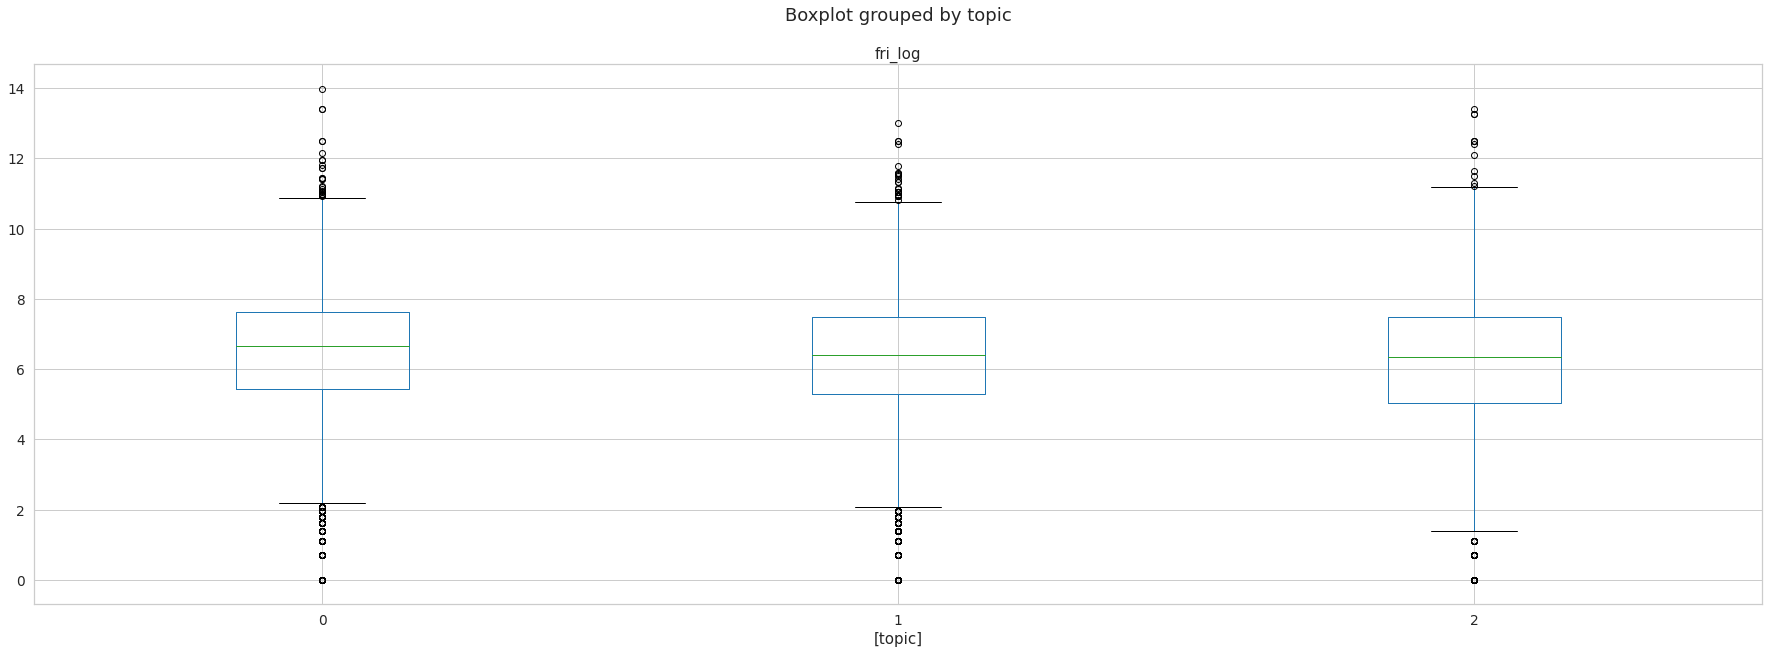

In [ ]:
combined_data.boxplot(column=['fri_log'], by=['topic'], figsize=(30,10))

In [ ]:
combined_data["len_text"]=combined_data['text'].apply(len)
combined_data["len_name"]=combined_data['screen_name'].apply(len)

In [ ]:
def bool_to_num(str1):
  if str1 == True:
    return 1
  return 0  

In [ ]:
combined_data['datetime'] = combined_data['created_at'].apply(pd.to_datetime)
combined_data['weekday']= combined_data['datetime'].apply(lambda x: x.isoweekday())
combined_data['weekday']= combined_data['datetime'].apply(lambda x: x.isoweekday())
combined_data['day']= combined_data['datetime'].apply(lambda x: x.day)
combined_data['num_verified'] = combined_data['verified'].apply(bool_to_num)
combined_data['num_is_quote'] = combined_data['is_quote'].apply(bool_to_num)
combined_data['num_is_retweet'] = combined_data['is_retweet'].apply(bool_to_num)

In [ ]:
combined_data.head(2)

,source,topic,fav_log,ret_log,fol_log,fri_log,len_text,len_name,weekday,day,num_verified,num_is_quote,num_is_retweet
0,TweetDeck,0,3.044522,0.0,7.000334,6.728629,279,11,1,9,0,1,0
1,Twitter for iPhone,2,7.643962,0.0,5.313206,6.437752,217,9,1,9,0,0,0


In [ ]:
combined_data = combined_data[['source', 'topic', 'fav_log', 'ret_log', 'fol_log', 'fri_log', 'len_text', 'len_name', 'weekday', 'day', 'num_verified', 'num_is_quote', 'num_is_retweet']]


Hot vector the categorical 

In [ ]:
combined_data.source = combined_data.source.astype('category')
combined_data.topicC = combined_data.topic.astype('category')
combined_data.weekday = combined_data.weekday.astype('category')
# Hint: Use pd.get_dummies()range

df1 = pd.concat([combined_data, pd.get_dummies(combined_data.weekday, prefix="weekday"), pd.get_dummies(combined_data.topicC, prefix="topic"), pd.get_dummies(combined_data.source, prefix="source")], axis=1)
combined_data.head(2)
df1
combined_data = df1
combined_data = combined_data.drop(['source', 'topic', 'weekday'], axis=1)
combined_data.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,fav_log,ret_log,fol_log,fri_log,len_text,len_name,day,num_verified,num_is_quote,num_is_retweet,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7,topic_0,topic_1,topic_2,source_1buvtw,source_365newsx,source_@thedextazlab,source_ACI Africa Tweets,source_Act-On Software,source_AdvisorStream v2,source_Agenparl,source_AgoraPulse Manager,source_Alexander Higgins,source_Apphi,source_AudioburstPublisher,source_Auto tweets,source_Automate.io,source_AvonSocial,source_BLOX CMS,source_BTCNu_bot,source_Bambu by Sprout Social,source_Blog2Social APP,source_Bot21,source_Buffer,...,source_Unshackled Content Poster,source_VoiceFeed,source_VoiceToData,source_Wildmoka,source_WordPress.com,source_ZT Social Analytics,source_Zapier.com,source_Zoho Social,source_aa.com.tr,source_allAfrica.com,source_betterthancoffee,source_corona_stats,source_covid19_counter,source_covid19oceanupdate,source_daily_twits,source_dlvr.it,source_drumup.io,source_eClincher,source_eupdater,source_flapol,source_floridapolitics.com,source_ifSocial - Deliver Media,source_itshotshit,source_lb3dtweeter,source_mLabs - Gestão de Redes Sociais,source_michaelwyres.com.au,source_mmmm_app,source_paulcrypto,source_pillowy mounds,source_posteador_ruby,source_remote.io,source_sputs,source_thevirustracker,source_tiorradio1 publisher,source_tiorradio2 publisher,source_tiorradio3 publisher,source_twitto_be_bot,source_vadenuevo,source_website-TwoTigers,source_Оwly
0,3.044522,0.0,7.000334,6.728629,279,11,9,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7.643962,0.0,5.313206,6.437752,217,9,9,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


separate into label and features

In [ ]:
label0 = combined_data['topic_0']
label1 = combined_data['topic_1']
label2 = combined_data['topic_2']


features = combined_data.drop(['topic_0','topic_1', 'topic_2'], axis=1)

Train Test split and then LinearRegression for Label 0

In [ ]:
from sklearn.model_selection import train_test_split
# Your code goes here
label = label0
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Your code goes here

reg = LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)
(np.sqrt(mean_squared_error(y_test, y_pred)))

965357.200482553

Standardize our features

In [ ]:
x_test = StandardScaler().fit_transform(x_test)
x_train = StandardScaler().fit_transform(x_train)

Run PCA to see if we can simplify our features. However, 100 components did not even give half the variance so we had to abadnom the PCA

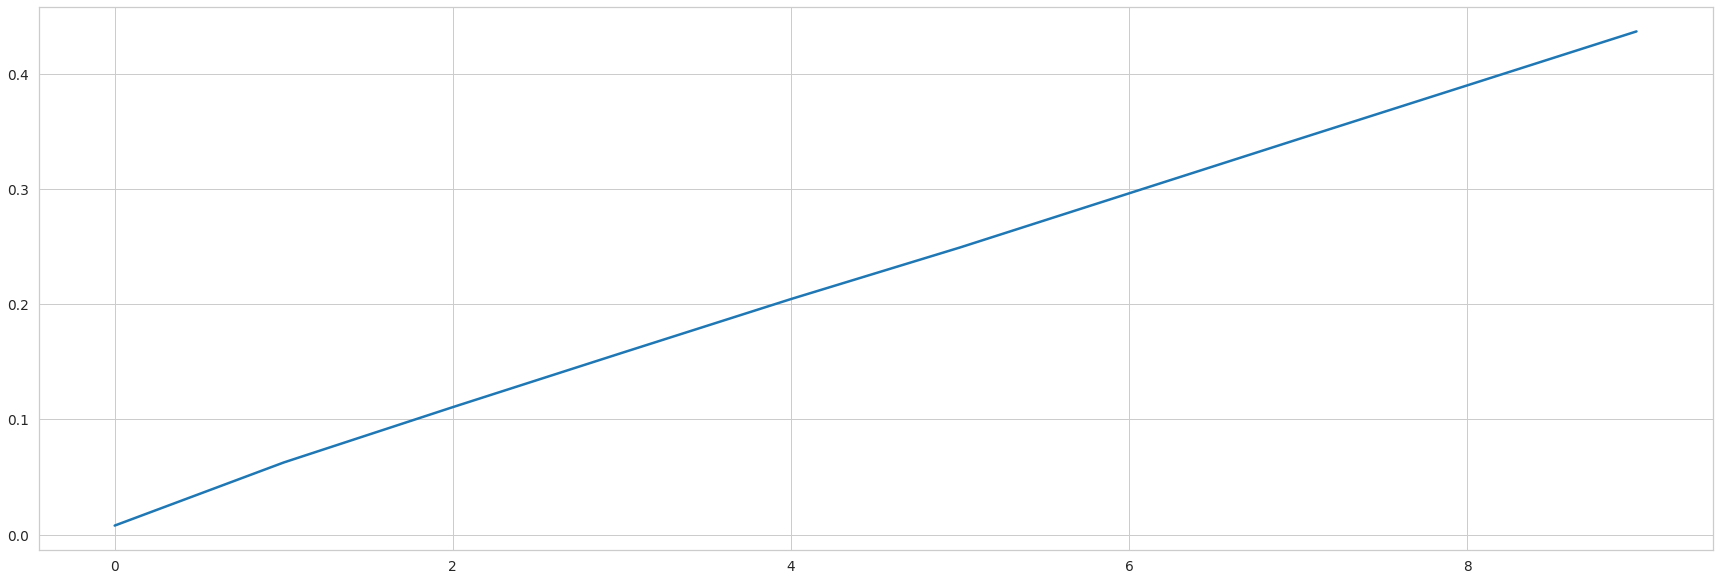

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
# Your code goes here
from sklearn.preprocessing import StandardScaler
x_train_scaled = StandardScaler().fit_transform(X=x_train)
pca_sums = []
for i in range(1,100, 10):
  pca = PCA(n_components=i)
  pca.fit(x_train_scaled)
  result = sum(pca.explained_variance_ratio_)
  pca_sums.append(result)
plt.figure(figsize=(30,10))
plt.plot(pca_sums)


GridSearch to see which RandomForest parameters work best

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Your code goes here
clf = RandomForestRegressor(random_state=42)
grid = {
    'n_estimators' : [60, 100, 140],
    'max_depth' : [5, 20, 50]
}
gs_clf = GridSearchCV(estimator=clf, param_grid=grid, cv=5)
gs_clf.fit(x_train, y_train)
gs_clf.best_params_


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

KeyboardInterrupt: ignored

The Ranodm Forest

In [ ]:
clf_final = RandomForestRegressor(n_estimators=80, max_depth=30)
clf_final.fit(x_train, y_train)
y_pred_0 = clf_final.predict(x_test)
print(np.sqrt(mean_squared_error(y_test, y_pred_0)))

0.4505746070142169


In [ ]:
label = label1
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2)
reg = LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))
x_test = StandardScaler().fit_transform(x_test)
x_train = StandardScaler().fit_transform(x_train)
clf = RandomForestRegressor(random_state=42)


109893522.53559433


In [ ]:
clf_final = RandomForestRegressor(n_estimators=80, max_depth=30)
clf_final.fit(x_train, y_train)
y_pred_1 = clf_final.predict(x_test)
print(np.sqrt(mean_squared_error(y_test, y_pred_1)))

0.4587552229179456


In [ ]:
label = label2
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2)
reg = LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))
x_test = StandardScaler().fit_transform(x_test)
x_train = StandardScaler().fit_transform(x_train)
clf = RandomForestRegressor(random_state=42)


883758.0727079349


In [ ]:
clf_final = RandomForestRegressor(n_estimators=80, max_depth=30)
clf_final.fit(x_train, y_train)
y_pred_2 = clf_final.predict(x_test)
print(np.sqrt(mean_squared_error(y_test, y_pred_2)))

0.37054239762401087


#Conclusion
The above shows how models are not ideal but do indeed manage to show some correlation between out features and the labels. 

The Topic 2 (last topic) in particular seems to be much more well deifined in terms of features as its predictions were better.

Also RandomForest seems to be a better model than Linear regression for our requirements

## **Tried to do full dataset in Spark but was unable to get LDA running so had to move to sklearn instead**

In [ ]:
a = 248617
combined_data_sec_2 = pd.concat([data00[:a], data12[:a], data13[:a], data14[:a], data15[:a],
                         data16[:a], data17[:a], data18[:a], data19[:a], data20[:a], data21[:a], 
                         data22[:a], data23[:a], data24[:a], data25[:a], data26[:a], data27[:a],
                         data28[:a]], ignore_index=True)

combined_data_sec_2.to_csv('combined_data.csv')

In [ ]:
!pip install pyspark

     |████████████████████████████████| 217.8MB 21kB/s 
     |████████████████████████████████| 204kB 48.8MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.5-py2.py3-none-any.whl size=218257927 sha256=ef8667ffc7d420cc5b8dcbd402c8f3f135a95493b7c588ebb54f6d44a3cdd086
  Stored in directory: /root/.cache/pip/wheels/bf/db/04/61d66a5939364e756eb1c1be4ec5bdce6e04047fc7929a3c3c
Successfully built pyspark


In [ ]:
#any code shown here is not mine


import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

import os

spark = SparkSession.builder.appName('ml-hw4').getOrCreate()

from pyspark.sql import SQLContext
sqlContext=SQLContext(sparkContext=spark.sparkContext, sparkSession=spark)


In [ ]:
from pyspark.sql.types import ArrayType
from pyspark.sql.types import StringType
from pyspark.sql.functions import udf



# stuff we'll need for text processing
from nltk.corpus import stopwords
import re as re
from pyspark.ml.feature import CountVectorizer , IDF
# stuff we'll need for building the model

from pyspark.mllib.linalg import Vector, Vectors
from pyspark.mllib.clustering import LDA, LDAModel
# reading the data
data = sqlContext.read.format("csv") \
   .options(header='true', inferschema='true') \
   .load(os.path.realpath("combined_data.csv"))

text = data.select('text')
StopWords = stopwords.words("english")

def function1(document):
  document = document.strip().lower()               
  document = re.split(" ", document)   
  word= [x for x in document if x.isalpha()]           
  word = [x for x in word if len(x) > 3]            
  word = [x for x in word if x not in StopWords]
  return word

fun_udf = udf(lambda y: function1(y), ArrayType(StringType()))
tokens = data.select(fun_udf('text'))
from pyspark.sql.functions import monotonically_increasing_id 
tokens = tokens.select("*").withColumn("index", monotonically_increasing_id().cast(IntegerType()))
tokens    

DataFrame[<lambda>(text): array<string>, index: int]

In [ ]:
#This part giving errors repeatedly



df_txts = tokens
# TF
cv = CountVectorizer(inputCol="<lambda>(text)", outputCol="features", vocabSize=5000, minDF=10.0)
cvmodel = cv.fit(df_txts)
result_cv = cvmodel.transform(df_txts)
num_topics = 10
max_iterations = 100
lda_model = LDA.train(result_tfidf[['index','features']].map(list), k=num_topics, maxIterations=max_iterations)